In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from datetime import datetime, time
#import pandas_datareader.data as pdr
import pandas_datareader.data as pdr
import yfinance as yf

In [3]:
#Download historical stock data
ticker_symbol = 'AAPL'
stock_data = yf.download(tickers= ticker_symbol, start= '2010-01-01', end= '2025-01-01')
print(stock_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455077  6.391278  6.422877  493729600
2010-01-05  6.451466  6.487879  6.417459  6.458086  601904800
2010-01-06  6.348845  6.477043  6.342224  6.451464  552160000
2010-01-07  6.337108  6.379842  6.291065  6.372318  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328683  447610800


Another methods for data extraction

In [4]:
today = datetime.now().date()
five_year_ago = today.replace(year = today.year-5)
ten_year_ago = today.replace(year = today.year-10)
twenty_year_ago = today.replace(year= today.year-20)
stock_symbol = "AAPL"
try:
    data =yf.download(stock_symbol, start=ten_year_ago, end=today, rounding=True,multi_level_index=False)
    print(data.head())
except Exception as e:
    print(f"Error: {e}")

[*********************100%***********************]  1 of 1 completed

            Close   High    Low   Open     Volume
Date                                             
2015-04-06  28.44  28.48  27.77  27.80  148776000
2015-04-07  28.14  28.61  28.13  28.51  140049200
2015-04-08  28.05  28.23  27.91  28.11  149316800
2015-04-09  28.26  28.27  27.84  28.11  129936000
2015-04-10  28.38  28.41  27.97  28.13  160752000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-04-06 to 2025-04-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2515 non-null   float64
 1   High    2515 non-null   float64
 2   Low     2515 non-null   float64
 3   Open    2515 non-null   float64
 4   Volume  2515 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


Test for Normality

In [6]:
from scipy.stats import jarque_bera

jb_stat, jb_p = jarque_bera(data['Close'])

print("Jarque-Bera statistic :", jb_stat)
print("p-value:", jb_p)

if jb_p < 0.05:
    print("the dataset is not normally distributed")
else:
    print("the dataset is normally distributed")


Jarque-Bera statistic : 230.79692155655357
p-value: 7.639857601209177e-51
the dataset is not normally distributed


Test for Autocorrelation

In [7]:
from statsmodels.stats.diagnostic import acorr_ljungbox

def ljungbox_test(data, lags_list=[5,10]):
    for lag in lags_list:
        lb_test = acorr_ljungbox(data, lags= lags_list, return_df=True)

        p_value = lb_test['lb_pvalue'].iloc[0]

        if p_value > 0.05:
            interpretation = f"Fail to reject the null hypothesis at lag {lag}: No significance autocorrelation."
        else:
            interpretation = f"Reject null hypothesis at lag {lag}: Significant autocorrelation present"

        print(f"Ljung-Box test p-value for lag {lag}: {p_value:.5f}")
        print(f"Interpretation: {interpretation}")
        print()

ljungbox_test(data['Close'])

Ljung-Box test p-value for lag 5: 0.00000
Interpretation: Reject null hypothesis at lag 5: Significant autocorrelation present

Ljung-Box test p-value for lag 10: 0.00000
Interpretation: Reject null hypothesis at lag 10: Significant autocorrelation present



Exploratory data analysis

In [8]:
import plotly.express as px


In [10]:
fig = px.line(data, x=data.index, y ='Close', title=f'The close price of stock {ticker_symbol}',
              labels={'Close':'Close_price$'},
              template='plotly', width=1000, height=600)
fig.update_traces(line_color = 'black')
fig.update_layout(title_font_color = 'blue', title_font_size = 20)
fig.show()

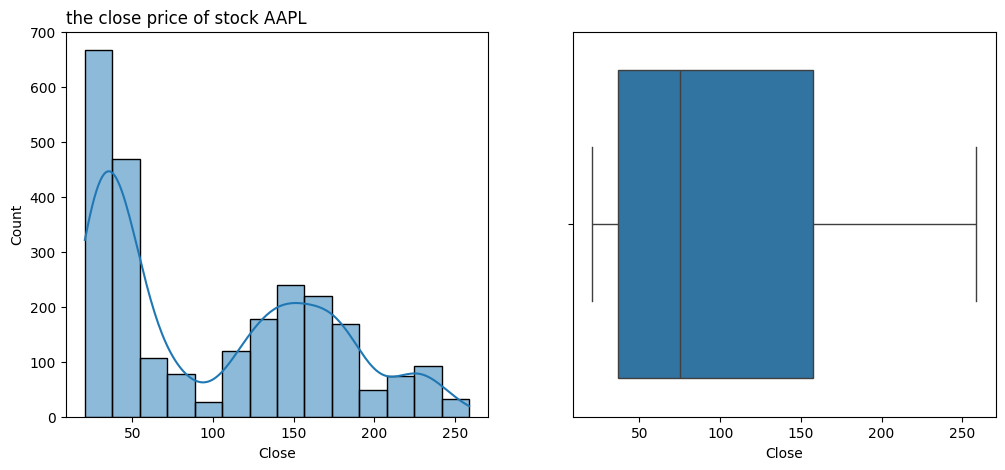

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title(f'the close price of stock {ticker_symbol}', loc ='left')
sns.histplot(data["Close"], kde=True)
plt.subplot(1,2,2)
sns.boxplot(data['Close'], orient='h')
plt.show()

In [ ]:
#define correlogram plot

In [ ]:
plot_correlogram(data['close'])

Test for stationary

In [ ]:
#Augmented Dickey_fuller test
result = 